In [90]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [91]:
data = pd.read_csv('pokemon_alopez247.csv')

In [16]:
data.nunique()

Number              721
Name                721
Type_1               18
Type_2               18
Total               183
HP                   94
Attack              100
Defense              97
Sp_Atk               94
Sp_Def               90
Speed               101
Generation            6
isLegendary           2
Color                10
hasGender             2
Pr_Male               7
Egg_Group_1          15
Egg_Group_2          13
hasMegaEvolution      2
Height_m             50
Weight_kg           398
Catch_Rate           33
Body_Style           14
dtype: int64

In [17]:
data.isna().sum()

Number                0
Name                  0
Type_1                0
Type_2              371
Total                 0
HP                    0
Attack                0
Defense               0
Sp_Atk                0
Sp_Def                0
Speed                 0
Generation            0
isLegendary           0
Color                 0
hasGender             0
Pr_Male              77
Egg_Group_1           0
Egg_Group_2         530
hasMegaEvolution      0
Height_m              0
Weight_kg             0
Catch_Rate            0
Body_Style            0
dtype: int64

In [19]:
import tabletext

show = [["Type_2","Pr_Male","Egg_Group_2"],
        [371,77,530],]

print (tabletext.to_text(show))

┌────────┬─────────┬─────────────┐
│ Type_2 │ Pr_Male │ Egg_Group_2 │
├────────┼─────────┼─────────────┤
│    371 │      77 │         530 │
└────────┴─────────┴─────────────┘


# 2. Preprocessing variables based on type

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 721 entries, 0 to 720
Data columns (total 23 columns):
Number              721 non-null int64
Name                721 non-null object
Type_1              721 non-null object
Type_2              350 non-null object
Total               721 non-null int64
HP                  721 non-null int64
Attack              721 non-null int64
Defense             721 non-null int64
Sp_Atk              721 non-null int64
Sp_Def              721 non-null int64
Speed               721 non-null int64
Generation          721 non-null int64
isLegendary         721 non-null bool
Color               721 non-null object
hasGender           721 non-null bool
Pr_Male             644 non-null float64
Egg_Group_1         721 non-null object
Egg_Group_2         191 non-null object
hasMegaEvolution    721 non-null bool
Height_m            721 non-null float64
Weight_kg           721 non-null float64
Catch_Rate          721 non-null int64
Body_Style          721 non-

In [92]:
#COLUMNS BY TYPE
int_columns = ['Total', 'HP', 'Attack','Defense', 'Sp_Atk', 'Sp_Def', 'Speed','Height_m', 'Weight_kg', 'Catch_Rate']
columns_freq = ['Type_1', 'Type_2', 'Color','Pr_Male', 'Egg_Group_1', 'Egg_Group_2', 'Body_Style' ]
other = ['Generation', 'isLegendary', 'hasGender', 'hasMegaEvolution']

In [93]:
#DATASETS BY TYPE
data_int = data[int_columns]
data_freq = data[columns_freq]

## 3.1. Preprocessing integer variables

In this section we will explore the distribution of all the integer variables and based on the visualization we will decide whether the variables need to be transformed. The reason for this is that the most ML algorithms assume normality. 

In [25]:
data_int

,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Height_m,Weight_kg,Catch_Rate
0,318,45,49,49,65,65,45,0.71,6.9,45
1,405,60,62,63,80,80,60,0.99,13.0,45
2,525,80,82,83,100,100,80,2.01,100.0,45
3,309,39,52,43,60,50,65,0.61,8.5,45
4,405,58,64,58,80,65,80,1.09,19.0,45
...,...,...,...,...,...,...,...,...,...,...
716,680,126,131,95,131,98,99,5.79,203.0,45
717,600,108,100,121,81,95,95,5.00,305.0,3
718,600,50,100,150,100,150,50,0.71,8.8,3
719,600,80,110,60,150,130,70,0.51,9.0,3


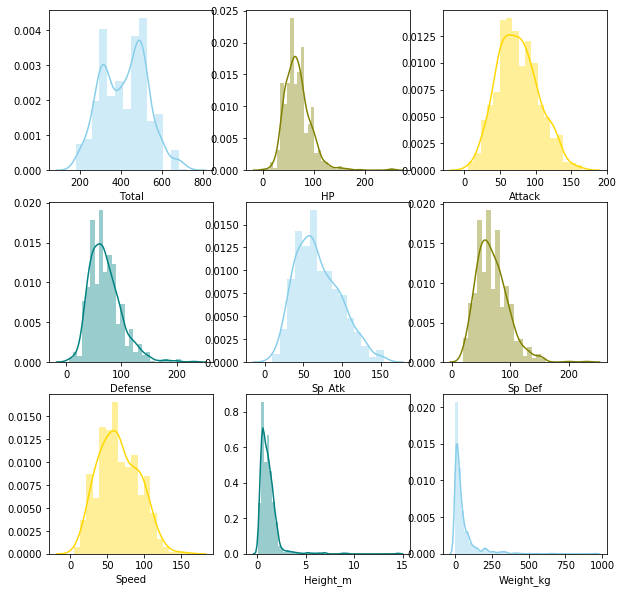

In [26]:
f, axes = plt.subplots(3, 3, figsize=(10, 10), sharex=False)
sns.distplot( data["Total"] , color="skyblue", ax=axes[0, 0])
sns.distplot( data["HP"] , color="olive", ax=axes[0, 1])
sns.distplot( data["Attack"] , color="gold", ax=axes[0, 2])
sns.distplot( data["Defense"] , color="teal", ax=axes[1, 0])
sns.distplot( data["Sp_Atk"] , color="skyblue", ax=axes[1, 1])
sns.distplot( data["Sp_Def"] , color="olive", ax=axes[1, 2])
sns.distplot( data["Speed"] , color="gold", ax=axes[2, 0])
sns.distplot( data["Height_m"] , color="teal", ax=axes[2, 1])
sns.distplot( data["Weight_kg"] , color="skyblue", ax=axes[2, 2])

From this plot we see that most of the variables expect for the "Weight" and "Height" (skewed) and "Total"(bimodal) are normally distrubuted. In the following steps we will apply log-transformation to "Weight" and "Height" which will make out data more normally distributed and will skale the data so the two columns will have values in similar ranges. For the variable "Total" we will keep it like it is because it is a sum of all the other variables that are normally distributed. 

In [27]:
print ("Skewness of var Height : %.2f"%(data_int["Height_m"].skew()))
print ("Skewness of var Weight : %.2f"%(data_int["Weight_kg"].skew()))

Skewness of var Height : 5.51
Skewness of var Weight : 4.01


In [30]:
#LOG TRANSFORMATION
data_int["Weight_kg"] = data_int["Weight_kg"].map(lambda i: np.log(i) if i > 0 else 0)
data_int["Height_m"] = data_int["Height_m"].map(lambda i: np.log(i) if i > 0 else 0)

/usr/local/Cellar/jupyter/1.0.0_5/libexec/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/Cellar/jupyter/1.0.0_5/libexec/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [31]:
print ("Skewness of var Height : %.2f"%(data_int["Height_m"].skew()))
print ("Skewness of var Weight : %.2f"%(data_int["Weight_kg"].skew()))

Skewness of var Height : 0.10
Skewness of var Weight : -0.51


We can see that the skewness reduced and now we will prove it also visually. 

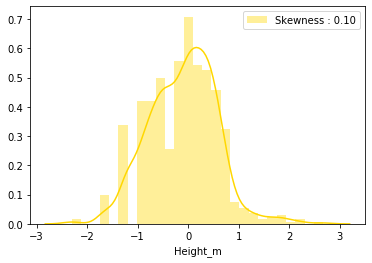

In [32]:
g = sns.distplot(data_int["Height_m"], color="gold", label="Skewness : %.2f"%(data_int["Height_m"].skew()))
g = g.legend(loc="best")

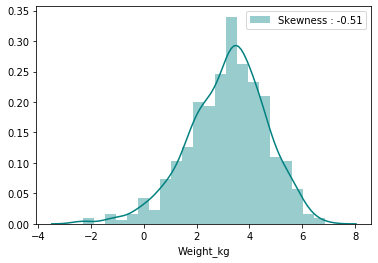

In [33]:
g = sns.distplot(data_int["Weight_kg"], color="teal", label="Skewness : %.2f"%(data_int["Weight_kg"].skew()))
g = g.legend(loc="best")

## 3.2. Preprocessing categorical variables and variables with missing values

In [34]:
data_freq

,Type_1,Type_2,Color,Pr_Male,Egg_Group_1,Egg_Group_2,Body_Style
0,Grass,Poison,Green,0.875,Monster,Grass,quadruped
1,Grass,Poison,Green,0.875,Monster,Grass,quadruped
2,Grass,Poison,Green,0.875,Monster,Grass,quadruped
3,Fire,NaN,Red,0.875,Monster,Dragon,bipedal_tailed
4,Fire,NaN,Red,0.875,Monster,Dragon,bipedal_tailed
...,...,...,...,...,...,...,...
716,Dark,Flying,Red,NaN,Undiscovered,NaN,two_wings
717,Dragon,Ground,Green,NaN,Undiscovered,NaN,serpentine_body
718,Rock,Fairy,Pink,NaN,Undiscovered,NaN,head_arms
719,Psychic,Ghost,Purple,NaN,Undiscovered,NaN,head_only


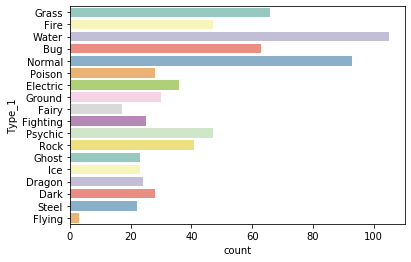

In [35]:
g = sns.countplot( y = data["Type_1"] , palette="Set3", )

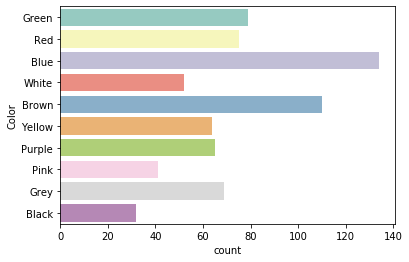

In [36]:
g = sns.countplot( y = data["Color"] , palette="Set3", )

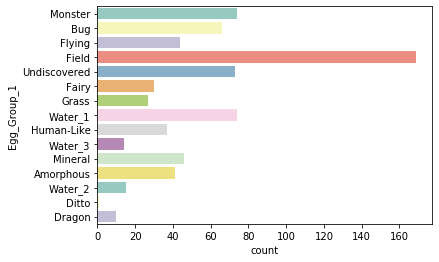

In [37]:
g = sns.countplot( y = data["Egg_Group_1"] , palette="Set3", )

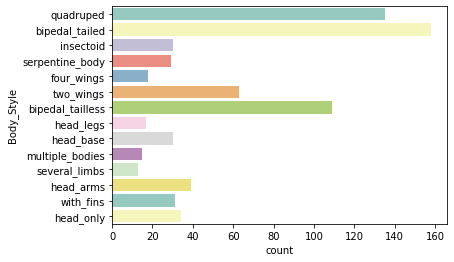

In [38]:
g = sns.countplot( y = data["Body_Style"] , palette="Set3", )

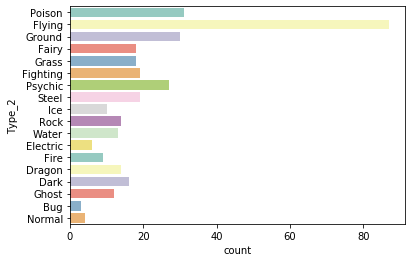

In [39]:
g = sns.countplot( y = data["Type_2"] , palette="Set3", )

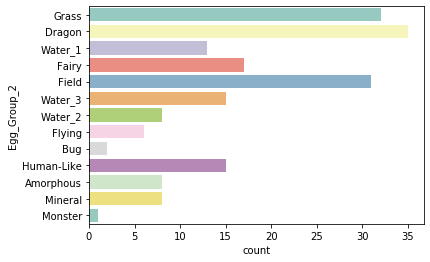

In [40]:
g = sns.countplot( y = data["Egg_Group_2"] , palette="Set3", )

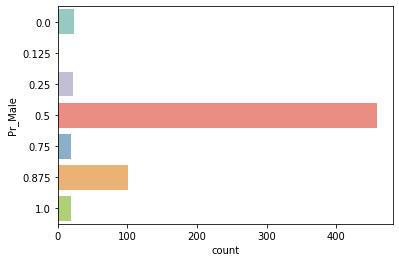

In [41]:
g = sns.countplot( y = data["Pr_Male"] , palette="Set3", )

Plotting all of the categorical variables shows us that in the class the frequencies are quite different and maybe that is a feature we want to preserve while transforming the categorical variables. Using frequency encoding will also reduce the number of dimensions as oppose to one-hot encoding where each value a class can take becomes a new variable. The missing values in “Type_2” and “Egg_Group_2” will be replaced by zero. For the variable “Pr_male” we will just fill the missing values with 0, because from the discription it indicates that a Pokemon does not have a male form. 

### 3.2.1. Filling missing values and Frequency encoding 

In [84]:
data_freq.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 721 entries, 0 to 720
Data columns (total 7 columns):
Type_1         721 non-null object
Type_2         350 non-null object
Color          721 non-null object
Pr_Male        644 non-null float64
Egg_Group_1    721 non-null object
Egg_Group_2    191 non-null object
Body_Style     721 non-null object
dtypes: float64(1), object(6)
memory usage: 39.6+ KB


In [116]:
for i in columns_freq:
    s = dict(data_freq[i].value_counts())
    data_freq[i] = data_freq[i].map(s).fillna(0)
    #s.clear()
    
    

/usr/local/Cellar/jupyter/1.0.0_5/libexec/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [125]:
data_freq.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 721 entries, 0 to 720
Data columns (total 7 columns):
Type_1         721 non-null int64
Type_2         721 non-null float64
Color          721 non-null int64
Pr_Male        721 non-null float64
Egg_Group_1    721 non-null int64
Egg_Group_2    721 non-null float64
Body_Style     721 non-null int64
dtypes: float64(3), int64(4)
memory usage: 39.6 KB


In [126]:
columns_freq1 = ['Type_1', 'Color', 'Egg_Group_1', 'Body_Style' ]
columns_freq2 = ['Type_2', 'Pr_Male', 'Egg_Group_2']

In [128]:
data.isna().sum()

Number                0
Name                  0
Type_1                0
Type_2              371
Total                 0
HP                    0
Attack                0
Defense               0
Sp_Atk                0
Sp_Def                0
Speed                 0
Generation            0
isLegendary           0
Color                 0
hasGender             0
Pr_Male              77
Egg_Group_1           0
Egg_Group_2         530
hasMegaEvolution      0
Height_m              0
Weight_kg             0
Catch_Rate            0
Body_Style            0
dtype: int64

In [130]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 721 entries, 0 to 720
Data columns (total 23 columns):
Number              721 non-null int64
Name                721 non-null object
Type_1              721 non-null object
Type_2              350 non-null object
Total               721 non-null int64
HP                  721 non-null int64
Attack              721 non-null int64
Defense             721 non-null int64
Sp_Atk              721 non-null int64
Sp_Def              721 non-null int64
Speed               721 non-null int64
Generation          721 non-null int64
isLegendary         721 non-null bool
Color               721 non-null object
hasGender           721 non-null bool
Pr_Male             644 non-null float64
Egg_Group_1         721 non-null object
Egg_Group_2         191 non-null object
hasMegaEvolution    721 non-null bool
Height_m            721 non-null float64
Weight_kg           721 non-null float64
Catch_Rate          721 non-null int64
Body_Style          721 non-

In [131]:
for i in columns_freq1:
    data_freq[i] = data_freq[i].apply(lambda x: x / 721)
data_freq['Type_2'] = data_freq['Type_2'].apply(lambda x: x /350 )
data_freq['Pr_Male'] = data_freq['Pr_Male'].apply(lambda x: x /644 )
data_freq['Egg_Group_2'] = data_freq['Egg_Group_2'].apply(lambda x: x /191 )

/usr/local/Cellar/jupyter/1.0.0_5/libexec/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/Cellar/jupyter/1.0.0_5/libexec/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/Cellar/jupyter/1.0.0_5/libexec/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on 

In [132]:
#THIS IS THE CATEGORICAL DATA

,Type_1,Type_2,Color,Pr_Male,Egg_Group_1,Egg_Group_2,Body_Style
0,0.091540,0.088571,0.109570,0.156832,0.102635,0.167539,0.187240
1,0.091540,0.088571,0.109570,0.156832,0.102635,0.167539,0.187240
2,0.091540,0.088571,0.109570,0.156832,0.102635,0.167539,0.187240
3,0.130374,0.000000,0.104022,0.156832,0.102635,0.183246,0.219140
4,0.130374,0.000000,0.104022,0.156832,0.102635,0.183246,0.219140
...,...,...,...,...,...,...,...
716,0.077670,0.248571,0.104022,0.000000,0.101248,0.000000,0.087379
717,0.033287,0.085714,0.109570,0.000000,0.101248,0.000000,0.040222
718,0.056865,0.051429,0.056865,0.000000,0.101248,0.000000,0.054092
719,0.130374,0.034286,0.090153,0.000000,0.101248,0.000000,0.047157


## 3.3. Other data

In [ ]:
other = ['Generation', 'isLegendary', 'hasGender', 'hasMegaEvolution']

In [133]:
data_other = data[other]

In [138]:
data_other['isLegendary'] = data['isLegendary'].astype(int)
data_other['hasGender'] = data['hasGender'].astype(int)
data_other['hasMegaEvolution'] = data['hasMegaEvolution'].astype(int)


/usr/local/Cellar/jupyter/1.0.0_5/libexec/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/Cellar/jupyter/1.0.0_5/libexec/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/Cellar/jupyter/1.0.0_5/libexec/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

## 3.4. Concatenating all the preprocessed subsets

In [141]:
preprocess = pd.concat([data_int, data_freq, data_other], axis=1)

In [147]:
data.columns

Index(['Number', 'Name', 'Type_1', 'Type_2', 'Total', 'HP', 'Attack',
       'Defense', 'Sp_Atk', 'Sp_Def', 'Speed', 'Generation', 'isLegendary',
       'Color', 'hasGender', 'Pr_Male', 'Egg_Group_1', 'Egg_Group_2',
       'hasMegaEvolution', 'Height_m', 'Weight_kg', 'Catch_Rate',
       'Body_Style'],
      dtype='object')

In [148]:
final_col = ['Type_1', 'Type_2', 'Total', 'HP', 'Attack',
       'Defense', 'Sp_Atk', 'Sp_Def', 'Speed', 'Generation', 'isLegendary',
       'Color', 'hasGender', 'Pr_Male', 'Egg_Group_1', 'Egg_Group_2',
       'hasMegaEvolution', 'Height_m', 'Weight_kg', 'Catch_Rate',
       'Body_Style']

In [149]:
final = preprocess[final_col]

In [153]:
final.to_csv('preprocessed.csv')